In [2]:
import glob
import re
from matplotlib.lines import Line2D
import os
from pathlib import Path
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import read_submissions as rs
import csv

In [3]:
def get_pixel_value_from_coords(fits_file, x, y, z, team_name='Team_SKAO'):
    """
    Returns the value at a given real-space coordinate (x, y, z) in a 3D FITS cube.
    Assumes coordinates are in the same units as defined in the FITS header.

    Parameters:
    - fits_file: path to the FITS cube
    - x, y, z: coordinates in real units (same as CRVAL/CDELT frame)

    Returns:
    - Value at the interpolated or nearest voxel.
    """
    with fits.open(fits_file) as hdul:
        data = hdul[0].data
        header = hdul[0].header

        # Convert real-space coordinate to index using CRVAL, CRPIX, CDELT
        def to_index(coord, crval, crpix, cdelt):
            return int(round((coord - crval) / cdelt + crpix - 1))

        ix = to_index(x, header['CRVAL1'], header['CRPIX1'], header['CDELT1'])
        iy = to_index(y, header['CRVAL2'], header['CRPIX2'], header['CDELT2'])
        iz = to_index(z, header['CRVAL3'], header['CRPIX3'], header['CDELT3'])

        shape = data.shape
        if not (0 <= ix < shape[0] and 0 <= iy < shape[1] and 0 <= iz < shape[2]):
            raise IndexError(f"Coordinate ({x}, {y}, {z}) maps to index ({ix},{iy},{iz}) out of bounds {shape}")
        if team_name in ['LoreliB', 'EoR-PIE-MC', 'EoR-PIE']:
            return data[iz, iy, ix]
        else:
            return data[ix, iy, iz]


In [4]:
# Base directory and team folders
submissions_dir = '/Users/omkar.bait/work/SDC/sdc3b/submission_analysis/final_submissions/validated_submissions/PS1/team_folders/'
ps1_teams = rs.get_nonempty_subdirs(submissions_dir)

# Output storage
results = []

# Coordinate to query
query_coord = (0.699600, 0.401250, 0.125250)
# Loop through teams
for team_name in ps1_teams:
    ps1_file_name = team_name + '_PS1.fits'
    ps1_full_path = os.path.join(submissions_dir, team_name, ps1_file_name)
    
    try:
        pixel_val = get_pixel_value_from_coords(ps1_full_path, *query_coord, team_name=team_name)
    except Exception as e:
        print(f"[Error] {team_name}: {e}")
        pixel_val = float('nan')
    
    results.append((team_name, pixel_val))

# Save to CSV
csv_path = 'PS1_team_pixel_values.csv'
with open(csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Team', 'PixelValue'])
    writer.writerows(results)

print(f"Saved pixel values to {csv_path}")



Saved pixel values to PS1_team_pixel_values.csv


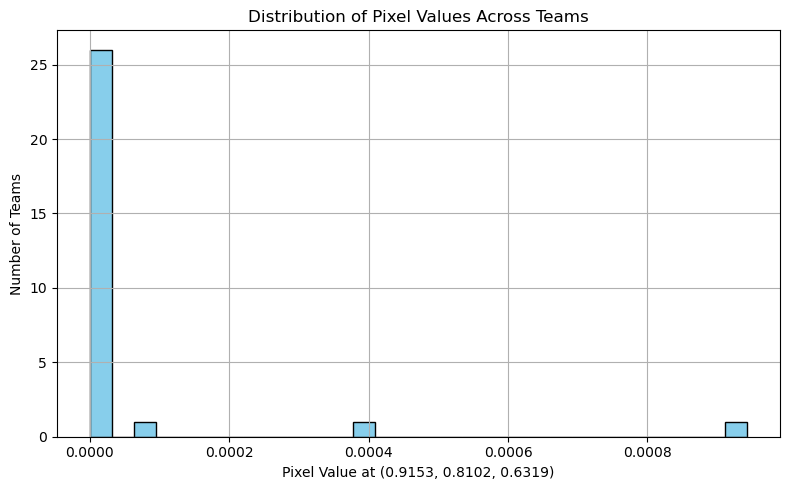

In [5]:
# Plot histogram
valid_values = [val for _, val in results if not (val != val)]  # filters out NaNs
plt.figure(figsize=(8, 5))
plt.hist(valid_values, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Pixel Value at (0.9153, 0.8102, 0.6319)')
plt.ylabel('Number of Teams')
plt.title('Distribution of Pixel Values Across Teams')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Base directory and team folders
submissions_dir = '/Users/omkar.bait/work/SDC/sdc3b/submission_analysis/final_submissions/validated_submissions/PS2/team_folders/'
ps2_teams = rs.get_nonempty_subdirs(submissions_dir)

# Output storage
results = []

# Coordinate to query
query_coord = (0.911173, 0.811154, 0.647652)

# Loop through teams
for team_name in ps2_teams:
    ps2_file_name = team_name + '_PS2.fits'
    ps2_full_path = os.path.join(submissions_dir, team_name, ps2_file_name)

    try:
        pixel_val = get_pixel_value_from_coords(ps2_full_path, *query_coord, team_name=team_name)
    except Exception as e:
        print(f"[Error] {team_name}: {e}")
        pixel_val = float('nan')
    
    results.append((team_name, pixel_val))

print(results)

# Save to CSV
csv_path = 'PS2_team_pixel_values.csv'
with open(csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Team', 'PixelValue'])
    writer.writerows(results)

print(f"Saved pixel values to {csv_path}")


[Error] Team_SKAO: [Errno 2] No such file or directory: '/Users/omkar.bait/work/SDC/sdc3b/submission_analysis/final_submissions/validated_submissions/PS2/team_folders/Team_SKAO/Team_SKAO_PS2.fits'
[('HIMALAYA', 0.0), ('LoreliB', 0.0), ('YEYE', 0.0002791232323810403), ('ERWA', 1.5058721723477183e-09), ('Insight_of_Cosmic_Reionization', 4.6849887098830717e-11), ('ToSKA-Explicit_likelihood', 0.0), ('21_To_Infinities', 0.0), ('EoR-PIE', 0.0), ('Shuimu-Tianlai-A', 0.0020998252507967176), ('ReionYuga', 0.0), ('HIstorians_LCDM-Bayesian', 2.6987312384795137e-10), ('LoreliA', 0.0), ('STHENO', 0.0), ('ToSKA-model_selection', 0.0), ('Imperial-Nottingham', 0.0), ('Cantabrigians', 0.009428013221446117), ('Akashganga', 0.0), ('Traditional_SEarCH', 7.235162532091073e-08), ('HIstorians_GPR', 0.0), ('Shuimu-Tianlai-C', 1.925477609731313e-09), ('KUSANAGI', 5.096256152771157e-08), ('COTSS-21', 1.539528945196875e-05), ('Modern_SEarCH', 3.626982698579635e-07), ('EoR-PIE-MC', 0.0), ('Shuimu-Tianlai-B', 2.01

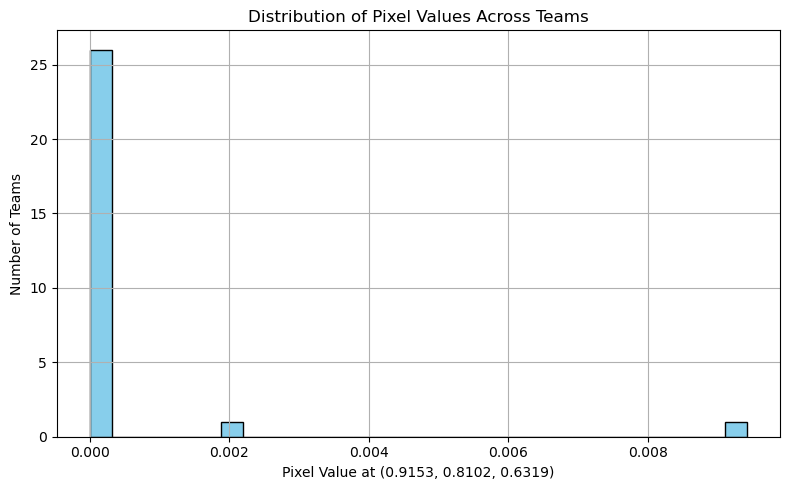

In [7]:
# Plot histogram
valid_values = [val for _, val in results if not (val != val)]  # filters out NaNs
plt.figure(figsize=(8, 5))
plt.hist(valid_values, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Pixel Value at (0.9153, 0.8102, 0.6319)')
plt.ylabel('Number of Teams')
plt.title('Distribution of Pixel Values Across Teams')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
from astropy.io import fits
import numpy as np

def get_volume_from_coords(fits_file, x, y, z, cube_widths=(0.1, 0.1, 0.1), team_name='Team_SKAO'):
    """
    Integrates pixel values within a cube centered at (x, y, z) with specified physical side widths per axis.

    Parameters:
    - fits_file: Path to the FITS cube
    - x, y, z: Coordinates in physical units (same units as CRVAL/CDELT)
    - cube_widths: Tuple of cube widths (width_x, width_y, width_z) in physical units
    - team_name: Team name for axis-order handling

    Returns:
    - Sum of pixel values within the cube region
    """
    width_x, width_y, width_z = cube_widths

    with fits.open(fits_file) as hdul:
        data = hdul[0].data
        header = hdul[0].header


        if team_name == 'ReionYuga':

            data = data/np.sum(data)
        else:
            None

        def to_index(coord, crval, crpix, cdelt):
            return int(round((coord - crval) / cdelt + crpix - 1))

        # Convert physical coords to voxel indices
        ix = to_index(x, header['CRVAL1'], header['CRPIX1'], header['CDELT1'])
        iy = to_index(y, header['CRVAL2'], header['CRPIX2'], header['CDELT2'])
        iz = to_index(z, header['CRVAL3'], header['CRPIX3'], header['CDELT3'])

        # Half-widths in voxel units
        hx = int(round(width_x / abs(header['CDELT1']) / 2))
        hy = int(round(width_y / abs(header['CDELT2']) / 2))
        hz = int(round(width_z / abs(header['CDELT3']) / 2))

        shape = data.shape

        if team_name in ['LoreliB', 'EoR-PIE-MC', 'EoR-PIE']:
            # Axis order: (z, y, x)
            x_min, x_max = np.clip(ix - hx, 0, shape[2]-1), np.clip(ix + hx + 1, 0, shape[2])
            y_min, y_max = np.clip(iy - hy, 0, shape[1]-1), np.clip(iy + hy + 1, 0, shape[1])
            z_min, z_max = np.clip(iz - hz, 0, shape[0]-1), np.clip(iz + hz + 1, 0, shape[0])
            cube = data[z_min:z_max, y_min:y_max, x_min:x_max]
        else:
            # Axis order: (x, y, z)
            x_min, x_max = np.clip(ix - hx, 0, shape[0]-1), np.clip(ix + hx + 1, 0, shape[0])
            y_min, y_max = np.clip(iy - hy, 0, shape[1]-1), np.clip(iy + hy + 1, 0, shape[1])
            z_min, z_max = np.clip(iz - hz, 0, shape[2]-1), np.clip(iz + hz + 1, 0, shape[2])
            cube = data[x_min:x_max, y_min:y_max, z_min:z_max]

        

        return np.sum(cube)


In [9]:
# Base directory and team folders
submissions_dir = '/Users/omkar.bait/work/SDC/sdc3b/submission_analysis/final_submissions/validated_submissions/PS1/team_folders/'
ps1_teams = rs.get_nonempty_subdirs(submissions_dir)

# Output storage
results = []

# Coordinate to query
#query_coord = (0.6692, 0.3629, 0.1070)

# Loop through teams
for team_name in ps1_teams:
    ps1_file_name = team_name + '_PS1.fits'
    ps1_full_path = os.path.join(submissions_dir, team_name, ps1_file_name)
    try:
        volume = get_volume_from_coords(fits_file=ps1_full_path, x=0.699600, y=0.401250, z=0.125250, 
                                        cube_widths=(0.2558, 0.3409, 0.2111),
                                        team_name=team_name)


        
        print(team_name, f"Integrated value: {volume:.4f}")
    except Exception as e:
        print(f"[Error] {team_name}: {e}")
        pixel_val = float('nan')
    
    results.append((team_name, volume))

# Save to CSV
csv_path = 'PS1_team_score_volume.csv'
with open(csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Team', 'score'])
    writer.writerows(results)

print(f"Saved pixel values to {csv_path}")


HIMALAYA Integrated value: 0.0013
LoreliB Integrated value: 0.3869
YEYE Integrated value: 0.0000
ERWA Integrated value: 0.0008
Insight_of_Cosmic_Reionization Integrated value: 0.0116
ToSKA-Explicit_likelihood Integrated value: 0.0998
21_To_Infinities Integrated value: 0.2660
EoR-PIE Integrated value: 0.5500
Shuimu-Tianlai-A Integrated value: 0.5877
ReionYuga Integrated value: 0.0490
HIstorians_LCDM-Bayesian Integrated value: 0.0678
LoreliA Integrated value: 0.0000
STHENO Integrated value: 0.0862
ToSKA-model_selection Integrated value: 0.7228
Imperial-Nottingham Integrated value: 0.9791
Cantabrigians Integrated value: 0.9998
Akashganga Integrated value: 0.0280
Traditional_SEarCH Integrated value: 0.0000
HIstorians_GPR Integrated value: 0.0000
Shuimu-Tianlai-C Integrated value: 0.6845
KUSANAGI Integrated value: 0.0000
COTSS-21 Integrated value: 0.1495
Modern_SEarCH Integrated value: 0.0000
EoR-PIE-MC Integrated value: 0.0014
Shuimu-Tianlai-B Integrated value: 0.6059
ToSKA-SBI_general Int

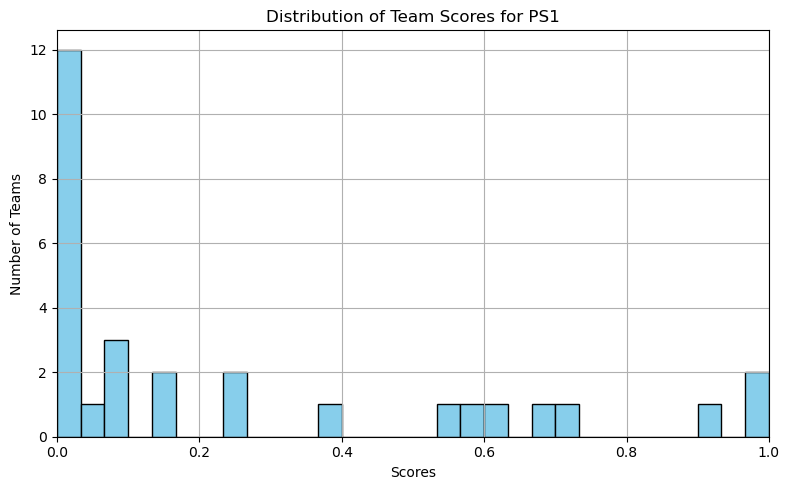

In [10]:
# Plot histogram
valid_values = [val for _, val in results if not (val != val)]  # filters out NaNs
plt.figure(figsize=(8, 5))
plt.hist(valid_values, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Number of Teams')
plt.title('Distribution of Team Scores for PS1')
plt.xlim([0, 1.0])
plt.grid(True)
plt.tight_layout()
plt.savefig('PS1_score_volume_hist.jpg', dpi=300)

In [11]:
# Base directory and team folders
submissions_dir = '/Users/omkar.bait/work/SDC/sdc3b/submission_analysis/final_submissions/validated_submissions/PS2/team_folders/'
ps2_teams = rs.get_nonempty_subdirs(submissions_dir)

# Output storage
results = []

# Coordinate to query
#query_coord = (0.6692, 0.3629, 0.1070)0.9153, 0.8102, 0.6319

# Loop through teams
for team_name in ps2_teams:
    ps2_file_name = team_name + '_PS2.fits'
    ps2_full_path = os.path.join(submissions_dir, team_name, ps2_file_name)
    
    try:
        volume = get_volume_from_coords(fits_file=ps2_full_path, x=0.911173, y=0.811154, z=0.647652, 
                                        cube_widths=(0.0763450, 0.123693, 0.20331),
                                        team_name=team_name)
        print(team_name, f"Integrated value: {volume:.4f}")
    except Exception as e:
        print(f"[Error] {team_name}: {e}")
        pixel_val = float('nan')
    
    results.append((team_name, volume))

# Save to CSV
csv_path = 'PS2_team_score_volume.csv'
with open(csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Team', 'score'])
    writer.writerows(results)

print(f"Saved pixel values to {csv_path}")

HIMALAYA Integrated value: 0.0551
LoreliB Integrated value: 0.0502
YEYE Integrated value: 0.5208
ERWA Integrated value: 0.0000
Insight_of_Cosmic_Reionization Integrated value: 0.0000
ToSKA-Explicit_likelihood Integrated value: 0.7308
21_To_Infinities Integrated value: 0.0000
EoR-PIE Integrated value: 0.3485
Shuimu-Tianlai-A Integrated value: 0.4282
ReionYuga Integrated value: 0.0000
HIstorians_LCDM-Bayesian Integrated value: 0.0000
LoreliA Integrated value: 0.0000
STHENO Integrated value: 0.0932
ToSKA-model_selection Integrated value: 0.7462
Imperial-Nottingham Integrated value: 0.5066
Cantabrigians Integrated value: 1.0000
Akashganga Integrated value: 0.9999
Traditional_SEarCH Integrated value: 0.7557
HIstorians_GPR Integrated value: 0.0000
Shuimu-Tianlai-C Integrated value: 0.0676
KUSANAGI Integrated value: 0.0004
COTSS-21 Integrated value: 0.4695
Modern_SEarCH Integrated value: 0.8513
EoR-PIE-MC Integrated value: 0.0004
Shuimu-Tianlai-B Integrated value: 0.0337
ToSKA-SBI_general Int

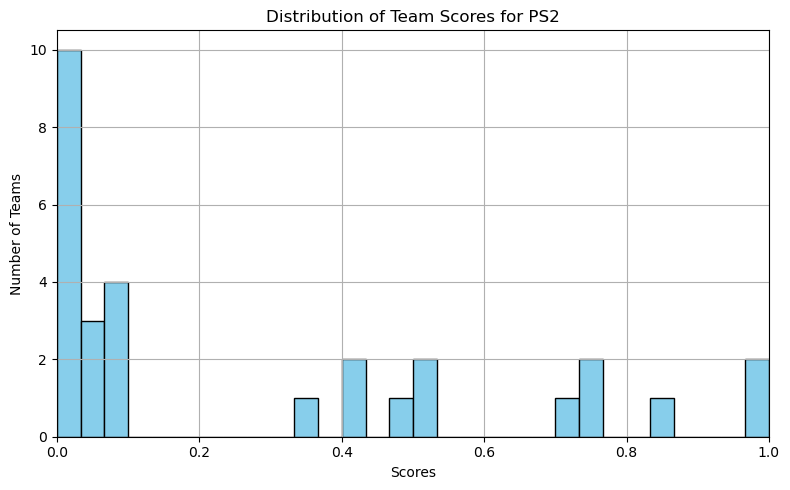

In [12]:
# Plot histogram
valid_values = [val for _, val in results if not (val != val)]  # filters out NaNs
plt.figure(figsize=(8, 5))
plt.hist(valid_values, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Number of Teams')
plt.title('Distribution of Team Scores for PS2')
plt.xlim([0, 1.0])
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig('PS2_score_volume_hist.jpg', dpi=300)

In [13]:
# Base directory and team folders
submissions_dir = '/Users/omkar.bait/work/SDC/sdc3b/submission_analysis/PS3_IM1_analysis/team_folders/'
ps3_teams = ['HIMALAYA', 'YEYE', 'Traditional_SEarCH', 'Modern_SEarCH']

# Output storage
results = []

# Coordinate to query
#query_coord = (0.6692, 0.3629, 0.1070)

# Loop through teams
for team_name in ps3_teams:
    ps3_file_name = team_name + '_PS3.fits'
    ps3_full_path = os.path.join(submissions_dir, team_name, ps3_file_name)
    try:
        volume = get_volume_from_coords(fits_file=ps3_full_path, x=0.770638, y=0.524308, z=0.244184, 
                                        cube_widths=(0.208909, 0.283752, 0.276496),
                                        team_name=team_name)


        
        print(team_name, f"Integrated value: {volume:.4f}")
    except Exception as e:
        print(f"[Error] {team_name}: {e}")
        pixel_val = float('nan')
    
    results.append((team_name, volume))

# Save to CSV
csv_path = 'PS3_team_score_volume.csv'
with open(csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Team', 'score'])
    writer.writerows(results)

print(f"Saved pixel values to {csv_path}")


HIMALAYA Integrated value: 0.0009
YEYE Integrated value: 0.0000
Traditional_SEarCH Integrated value: 0.0000
Modern_SEarCH Integrated value: 0.0666
Saved pixel values to PS3_team_score_volume.csv


In [14]:
# Base directory and team folders
submissions_dir = '/Users/omkar.bait/work/SDC/sdc3b/submission_analysis/PS3_IM1_analysis/team_folders/'
ps3_teams = ['HIMALAYA', 'YEYE', 'Traditional_SEarCH', 'Modern_SEarCH']

# Output storage
results = []

# Coordinate to query
#query_coord = (0.6692, 0.3629, 0.1070)

# Loop through teams
for team_name in ps3_teams:
    ps3_file_name = team_name + '_IM1.fits'
    ps3_full_path = os.path.join(submissions_dir, team_name, ps3_file_name)
    try:
        volume = get_volume_from_coords(fits_file=ps3_full_path, x=0.770638, y=0.524308, z=0.244184, 
                                        cube_widths=(0.208909, 0.283752, 0.276496),
                                        team_name=team_name)


        
        print(team_name, f"Integrated value: {volume:.4f}")
    except Exception as e:
        print(f"[Error] {team_name}: {e}")
        pixel_val = float('nan')
    
    results.append((team_name, volume))

# Save to CSV
csv_path = 'IM1_team_score_volume.csv'
with open(csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Team', 'score'])
    writer.writerows(results)

print(f"Saved pixel values to {csv_path}")


HIMALAYA Integrated value: 0.0013
YEYE Integrated value: 0.0871
Traditional_SEarCH Integrated value: 0.0000
Modern_SEarCH Integrated value: 0.0000
Saved pixel values to IM1_team_score_volume.csv
